## Circular Line Chart

https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

Last time we read in the following data set and plotted this graph:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [4]:
# Keep dates and temperatures
date_dict_all = {}

for val1, val2 in zip(df.date.values, df.meantemp.values):    
    day = datetime.strptime(val1.split()[0], "%Y-%m-%d")
    date_dict_all[day] = val2
    
new_df = pd.DataFrame.from_dict(date_dict_all, orient="index", columns=["meantemp"])

# Rolling average to smooth data 
avg_dict = {}
num_days = 7

keys = list(date_dict_all.keys())

for k in range(num_days - 1, len(keys)):
    cur_key = keys[k]
    avg = 0
    for i in range(num_days):
        avg += date_dict_all[keys[k-i]]
    avg /= num_days    
    avg_dict[keys[k]] = avg

new_df = pd.DataFrame.from_dict(avg_dict, orient="index", columns=["number"])

C:\Users\10502190\AppData\Local\Temp\ipykernel_13316\1960054838.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])


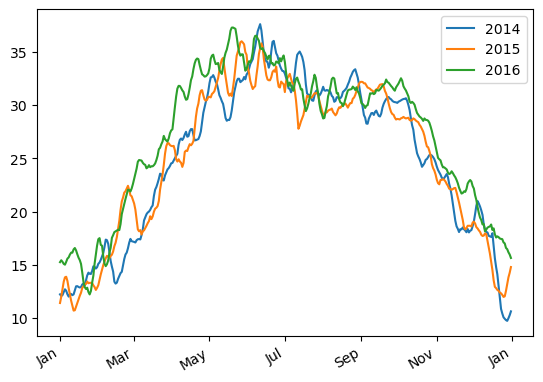

In [5]:
# Plot all years on same chart

avg_dict_2014 = {datetime(2016, int(k.month), int(k.day)): avg_dict[k] for k in avg_dict if k.year == 2014}
avg_dict_2015 = {datetime(2016, k.month, k.day): avg_dict[k] for k in avg_dict if k.year == 2015}
avg_dict_2016 = {k: avg_dict[k] for k in avg_dict if k.year == 2016}


df_2014 = pd.DataFrame.from_dict(avg_dict_2014, orient="index", columns=["number"])
df_2015 = pd.DataFrame.from_dict(avg_dict_2015, orient="index", columns=["number"])
df_2016 = pd.DataFrame.from_dict(avg_dict_2016, orient="index", columns=["number"])


fig, axes = plt.subplots()
df_2014.plot(ax=axes, label="2014")
df_2015.plot(ax=axes, label="2015")
df_2016.plot(ax=axes, label="2016")

h, l = axes.get_legend_handles_labels()
axes.legend(h, ["2014", "2015", "2016"])
axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])
    
#plt.tight_layout()    
plt.show()


Note that the left and right side labels on the x-axis are both for January. Time naturally wraps around each year, so this is a good candidate to turn into a circular chart. But how do we do that?

Enter:  Polar coordintes!

The following is a basic example of plotting on a circle in matplotlib:

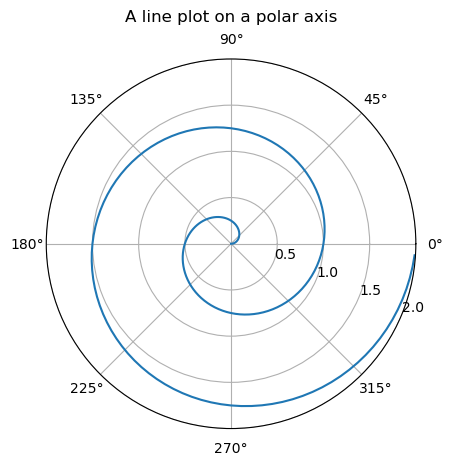

In [7]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

Plotting just 2014 on polar project out of the box doesn't seem to do the trick:

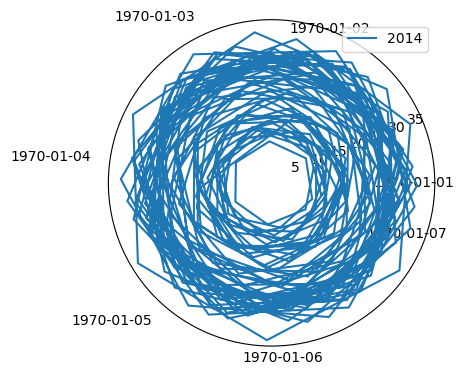

In [10]:
# Plot all years on same chart

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})
df_2014.plot(ax=axes, label="2014")
# df_2015.plot(ax=axes, label="2015")
# df_2016.plot(ax=axes, label="2016")

h, l = axes.get_legend_handles_labels()
axes.legend(h, ["2014", "2015", "2016"])
# axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])



#plt.tight_layout()    
plt.show()


The main issue is that we need to convert the x-coordinates into a polar scale. Let's create a new column in the dataframe to represent an angle (in radians) for each day:
* Divide the number of the day by 365 (fraction of the year that has already passed)
* Put January 1 at 0 = 2 pi, and proceed clockwise
* Radians = - (2pi * fraction)

In [37]:
# Convert days to radians

# day_degrees = [360 - (360 * i / 365) for i in range(365)]
# df_2014.insert(1, "degrees", day_degrees, True)

day_radians = [- (2 * np.pi * (i / 365)) for i in range(365)]
df_2014.insert(1, "radians", day_radians, True)

df_2014.head()


,number,radians
2016-01-01,12.242347,-0.000000
2016-01-02,12.081633,-0.017214
2016-01-03,12.170918,-0.034428
2016-01-04,12.456633,-0.051643
2016-01-05,12.714286,-0.068857


In [36]:
df_2014 = df_2014.drop(["radians", "degrees"], axis = 1)

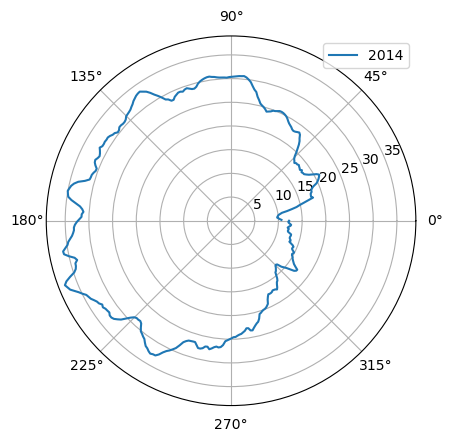

In [35]:
# Plot all years on same chart

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})

axes.plot(df_2014["radians"], df_2014["number"], label = "2014")


axes.legend()
# df_2014.plot(ax=axes, x = df_2014["degrees"], y = df_2014["number"])
# df_2015.plot(ax=axes, label="2015")
# df_2016.plot(ax=axes, label="2016")

# h, l = axes.get_legend_handles_labels()
# axes.legend(h, ["2014", "2015", "2016"])
# axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])



#plt.tight_layout()    
plt.show()


Much better! Now we can add in 2015:

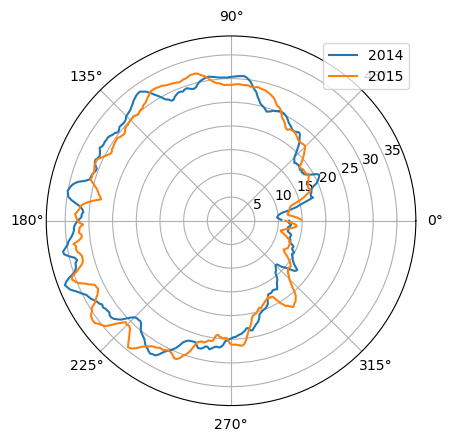

In [39]:
# Plot all years on same chart

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})

axes.plot(df_2014["radians"], df_2014["number"], label = "2014")
axes.plot(day_radians, df_2015["number"], label = "2015")


axes.legend()
# df_2014.plot(ax=axes, x = df_2014["degrees"], y = df_2014["number"])
# df_2015.plot(ax=axes, label="2015")
# df_2016.plot(ax=axes, label="2016")

# h, l = axes.get_legend_handles_labels()
# axes.legend(h, ["2014", "2015", "2016"])
# axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])



#plt.tight_layout()    
plt.show()

We need one extra value for 2016 because of leap year. This will throw the exact day comparison off ever so slightly, but hopefully by not much!
* To improve this, we can do what we did last time and convert all dates to 2016 instead

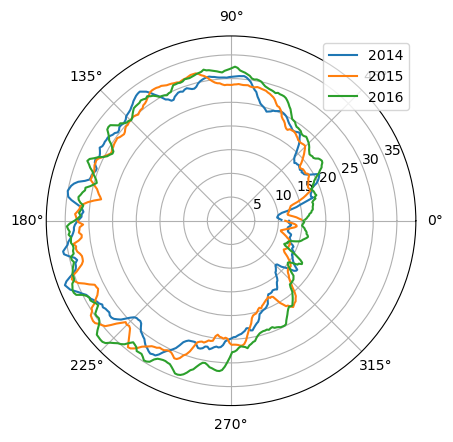

In [40]:
# Plot all years on same chart

leap_day_radians = [- (2 * np.pi * (i / 366)) for i in range(366)]

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})

axes.plot(day_radians, df_2014["number"], label = "2014")
axes.plot(day_radians, df_2015["number"], label = "2015")
axes.plot(leap_day_radians, df_2016["number"], label = "2016")


axes.legend()
# df_2014.plot(ax=axes, x = df_2014["degrees"], y = df_2014["number"])
# df_2015.plot(ax=axes, label="2015")
# df_2016.plot(ax=axes, label="2016")

# h, l = axes.get_legend_handles_labels()
# axes.legend(h, ["2014", "2015", "2016"])
# axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])



#plt.tight_layout()    
plt.show()

Very interesting. But there are number of things to fix, including:
* Legend overlaps part of the graph
* Need to convert angle labels to months (how do we calculate where to put the months?)
* How many labels do we need for temperatures? Currently the data lines run right over them

Let's start with removing the legend (will put one back later) and adjusting the angle labels:

[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]


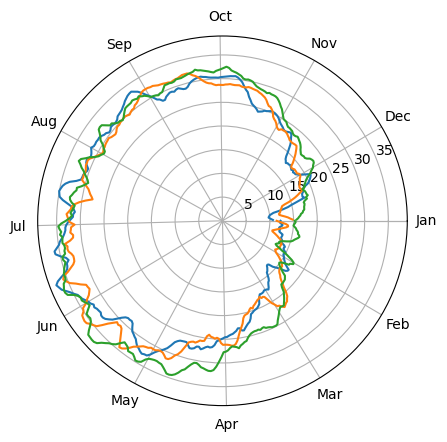

In [85]:
# Plot all years on same chart

leap_day_radians = [- (2 * np.pi * (i / 366)) for i in range(366)]

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})

axes.plot(day_radians, df_2014["number"], label = "2014")
axes.plot(day_radians, df_2015["number"], label = "2015")
axes.plot(leap_day_radians, df_2016["number"], label = "2016")

# Find index values of days that denote month marks

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
day_indices = [0]
for i in range(len(days_in_month) - 1):
    day_indices.append(day_indices[i] + days_in_month[i])
print(day_indices)

# set one tick per month (need to add last tick to wrap around)
x_ticks = [day_radians[i] for i in day_indices] + [-2 * np.pi]
x_tick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", ""]

axes.set_xticks(x_ticks, labels = x_tick_labels)
axes.set_xlim(-2 * np.pi, 0)


# axes.legend()


plt.show()

The gridlines for the months don't seem to be helping, so we will remove them:

[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]


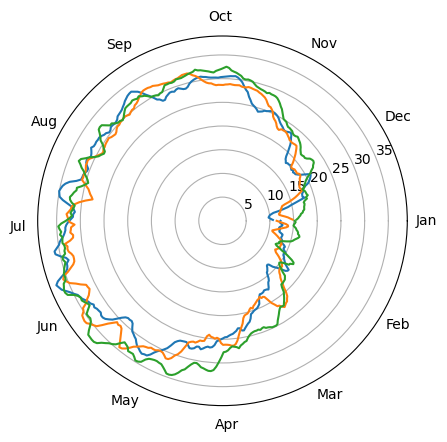

In [87]:
# Plot all years on same chart

leap_day_radians = [- (2 * np.pi * (i / 366)) for i in range(366)]

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})

axes.plot(day_radians, df_2014["number"], label = "2014")
axes.plot(day_radians, df_2015["number"], label = "2015")
axes.plot(leap_day_radians, df_2016["number"], label = "2016")

# Find index values of days that denote month marks

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
day_indices = [0]
for i in range(len(days_in_month) - 1):
    day_indices.append(day_indices[i] + days_in_month[i])
print(day_indices)

# set one tick per month (need to add last tick to wrap around)
x_ticks = [day_radians[i] for i in day_indices] + [-2 * np.pi]
x_tick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", ""]

axes.set_xticks(x_ticks, labels = x_tick_labels)
axes.set_xlim(-2 * np.pi, 0)

axes.grid(visible=False, axis="x")

# print(list(axes.spines.keys()))

# axes.spines[["polar"]].set_visible(False)


# axes.legend()


plt.show()

Now let's play with the y-coordinates:

[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]


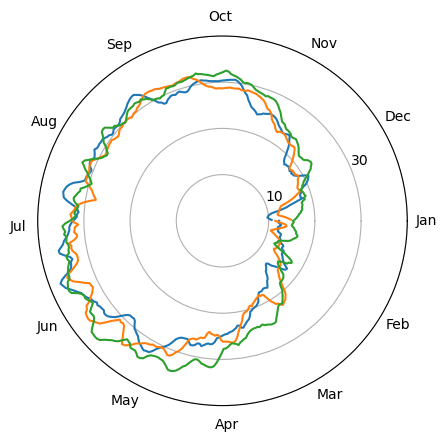

In [94]:
# Plot all years on same chart

leap_day_radians = [- (2 * np.pi * (i / 366)) for i in range(366)]

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})

axes.plot(day_radians, df_2014["number"], label = "2014")
axes.plot(day_radians, df_2015["number"], label = "2015")
axes.plot(leap_day_radians, df_2016["number"], label = "2016")

# Find index values of days that denote month marks

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
day_indices = [0]
for i in range(len(days_in_month) - 1):
    day_indices.append(day_indices[i] + days_in_month[i])
# print(day_indices)

# set one tick per month (need to add last tick to wrap around)
x_ticks = [day_radians[i] for i in day_indices] + [-2 * np.pi]
x_tick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", ""]

axes.set_xticks(x_ticks, labels = x_tick_labels)
axes.set_xlim(-2 * np.pi, 0)

print(axes.get_yticks())

axes.grid(visible=False, axis="x")

# axes.spines[["polar"]].set_visible(False)



y_ticks = [10, 20, 30, 40]
y_tick_labels = ["10", "", "30", ""]
axes.set_yticks(y_ticks, labels = y_tick_labels)




# axes.legend()


plt.show()

[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]


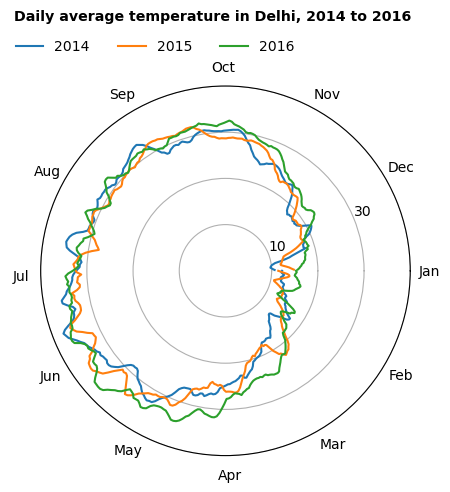

In [137]:
# Plot all years on same chart

leap_day_radians = [- (2 * np.pi * (i / 366)) for i in range(366)]

fig, axes = plt.subplots(subplot_kw={'projection': 'polar'})

axes.plot(day_radians, df_2014["number"], label = "2014")
axes.plot(day_radians, df_2015["number"], label = "2015")
axes.plot(leap_day_radians, df_2016["number"], label = "2016")

# Find index values of days that denote month marks

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
day_indices = [0]
for i in range(len(days_in_month) - 1):
    day_indices.append(day_indices[i] + days_in_month[i])
# print(day_indices)

# set one tick per month (need to add last tick to wrap around)
x_ticks = [day_radians[i] for i in day_indices] + [-2 * np.pi]
x_tick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", ""]

axes.set_xticks(x_ticks, labels = x_tick_labels)
axes.set_xlim(-2 * np.pi, 0)

print(axes.get_yticks())

axes.grid(visible=False, axis="x")

# axes.spines[["polar"]].set_visible(False)



y_ticks = [10, 20, 30, 40]
y_tick_labels = ["10", "", "30", ""]
axes.set_yticks(y_ticks, labels = y_tick_labels)


leg = axes.legend(frameon=False, ncols=3,  bbox_to_anchor=(0.72, 1.16))

# Title
axes.text(723 *np.pi / 1000, 71, "Daily average temperature in Delhi, 2014 to 2016", fontsize = 10.2, fontweight = "bold")



plt.show()